<a href="https://colab.research.google.com/github/Praisy-E/Code-for-all/blob/main/Scaling%2C_Re_sizing%2C_Interpolations_and_Cropping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load our input image
image = cv2.imread('/content/drive/MyDrive/GAN/lwir-train/I01267.jpg')

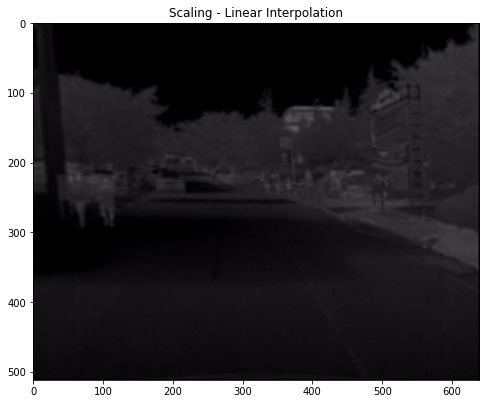

In [8]:
imshow("Scaling - Linear Interpolation", image)

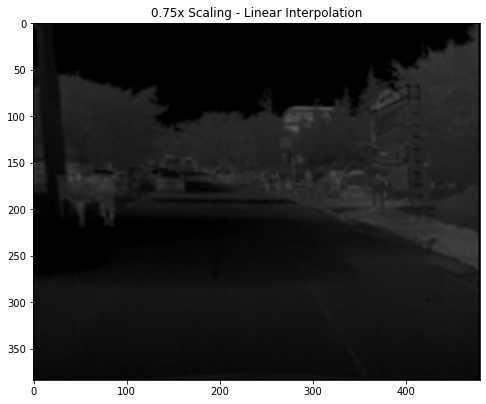

In [9]:
# If no interpolation is specified cv.INTER_LINEAR is used as default
# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
imshow("0.75x Scaling - Linear Interpolation", image_scaled)

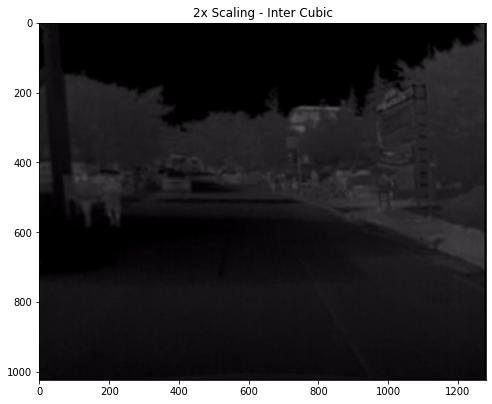

In [10]:
# Let's double the size of our image
img_scaled2 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
imshow("2x Scaling - Inter Cubic", img_scaled2)

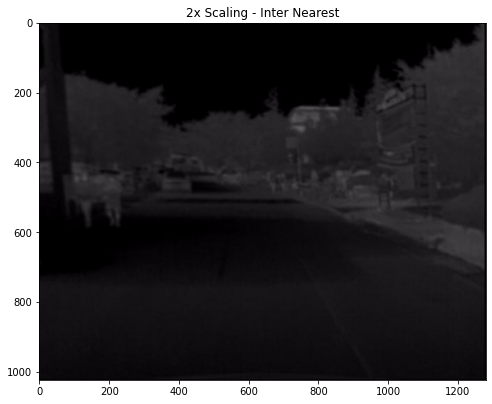

In [11]:
# Let's double the size of our image using inter_nearest interpolation
img_scaled3 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
imshow("2x Scaling - Inter Nearest", img_scaled3)

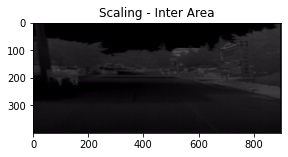

In [12]:
# Let's skew the re-sizing by setting exact dimensions
img_scaled4 = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
imshow("Scaling - Inter Area", img_scaled4)

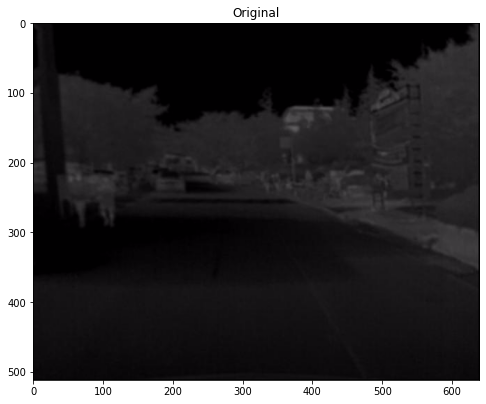

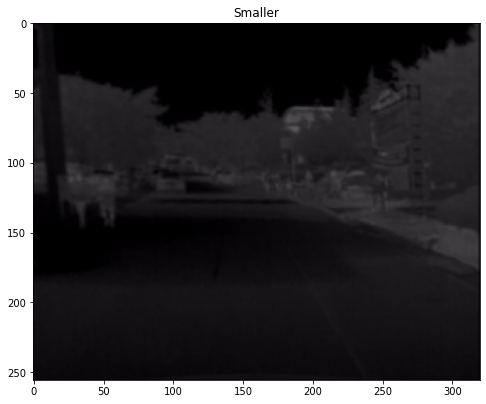

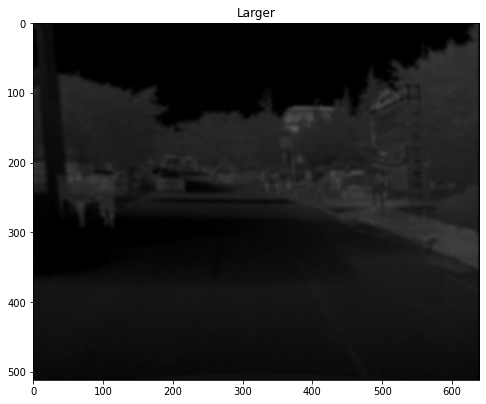

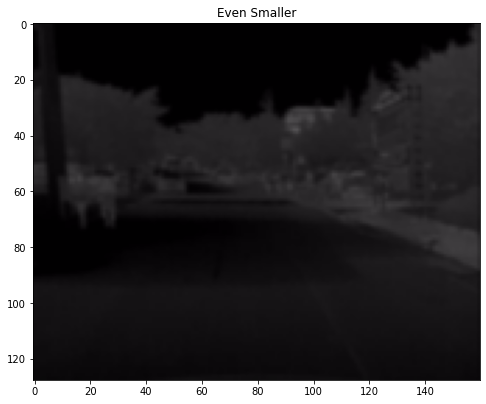

In [14]:
image = cv2.imread('/content/drive/MyDrive/GAN/lwir-train/I01267.jpg')

smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)

imshow("Original", image)
imshow('Smaller', smaller)
imshow('Larger', larger)

even_smaller = cv2.pyrDown(smaller)
imshow('Even Smaller', even_smaller)

In [15]:
image = cv2.imread('/content/drive/MyDrive/GAN/lwir-train/I01267.jpg')

In [17]:
# Get our image dimensions
height, width = image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
# using 0.25 to get the x,y position that is 1/4 down from the top left (0,0)
start_row, start_col = int(height * .25), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row , start_col:end_col]

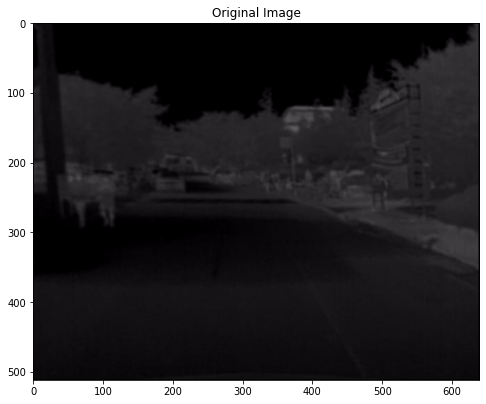

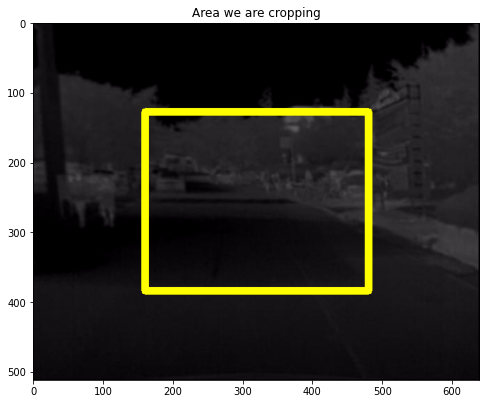

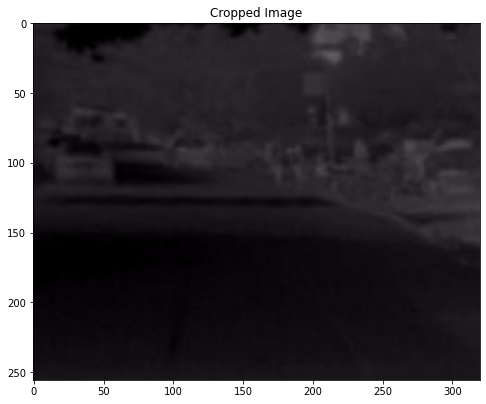

In [18]:

imshow("Original Image", image)

# The cv2.rectangle function draws a rectangle over our image (in-place operation)
copy = image.copy()
cv2.rectangle(copy, (start_col,start_row), (end_col,end_row), (0,255,255), 10)

imshow("Area we are cropping", copy)

imshow("Cropped Image", cropped) 